In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import statistics as st
from datetime import datetime
from matplotlib.pylab import rcParams
import warnings;
warnings.simplefilter("ignore")
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sns.set()

In [4]:
rcParams["figure.figsize"] = 20, 10



data = pd.read_excel("Exc.xlsx", index_col=0)
data.index.freq = "Q"
data.head()

,Umsatz
Time,
2007-09-30,5
2007-12-31,118
2008-03-31,241
2008-06-30,378
2008-09-30,419


In [5]:
rolmean = data[:44].rolling(window=7).mean()
rolmean
frct = list()
for i in range(11):
    frct.append(int(rolmean.iloc[-1]))
frct = np.array(frct)

from sklearn.metrics import mean_squared_error
print( mean_squared_error(data.values[44:], frct))


from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(data.values[44:], frct))


from sklearn.metrics import mean_absolute_error as mae
print(mae(data.values[44:], frct))

174733858.1818182
0.3103397317456276
11510.727272727272


In [6]:
frct

array([38306, 38306, 38306, 38306, 38306, 38306, 38306, 38306, 38306,
       38306, 38306])

In [7]:
data[:44].rolling(window=24).mean().iloc[24-1:].values

array([[ 9103.5       ],
       [ 9859.70833333],
       [10667.70833333],
       [12011.75      ],
       [13082.        ],
       [13887.5       ],
       [14840.5       ],
       [16850.58333333],
       [18427.875     ],
       [19607.375     ],
       [20757.5       ],
       [22676.54166667],
       [23818.70833333],
       [24598.45833333],
       [25404.20833333],
       [27243.33333333],
       [28126.5       ],
       [28615.83333333],
       [29375.91666667],
       [30924.        ],
       [31560.79166667]])

In [9]:
def moving_avg(x, n):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[n:] - cumsum[:-n]) / float(n)

#calculate moving average using previous 3 time periods
n = 7
rolmean = moving_avg(data[:44].values, n)
frct = list()
for i in range(11):
    frct.append(rolmean[-1])
frct = np.array(frct)

from sklearn.metrics import mean_squared_error
print( mean_squared_error(data.values[44:], frct))



from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(data.values[44:], frct))

from sklearn.metrics import mean_absolute_error as mae
print(mae(data.values[44:], frct))

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(data.values[44:], frct))




174733858.1818182
0.3103397317456276
11510.727272727272


13218.693512666756

In [10]:
def lwma(Data, period):
    weighted = []
    for i in range(len(Data)):
            try:
                total = np.arange(1, period + 1, 1) # weight matrix
                
                matrix = Data[i - period + 1: i + 1, 3:4]
                matrix = np.ndarray.flatten(matrix)
                matrix = total * matrix # multiplication
                wma = (matrix.sum()) / (total.sum()) # WMA
                weighted = np.append(weighted, wma) # add to array
            except ValueError:
                pass
    return weighted
x = lwma(data[:44].values, 12)

EWA

In [12]:
ewm = data[:44].ewm(span=7, adjust=False).mean()
frct = list()
for i in range(11):
    frct.append(int(ewm.iloc[-1]))
frct = np.array(frct)

from sklearn.metrics import mean_squared_error
print( mean_squared_error(data.values[44:], frct))


from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(data.values[44:], frct))

from sklearn.metrics import mean_absolute_error as mae
print(mae(data.values[44:], frct))

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(data.values[44:], frct))

176534215.1818182
0.3250559741697003
11845.727272727272


13286.617898540553

<AxesSubplot:xlabel='Time'>

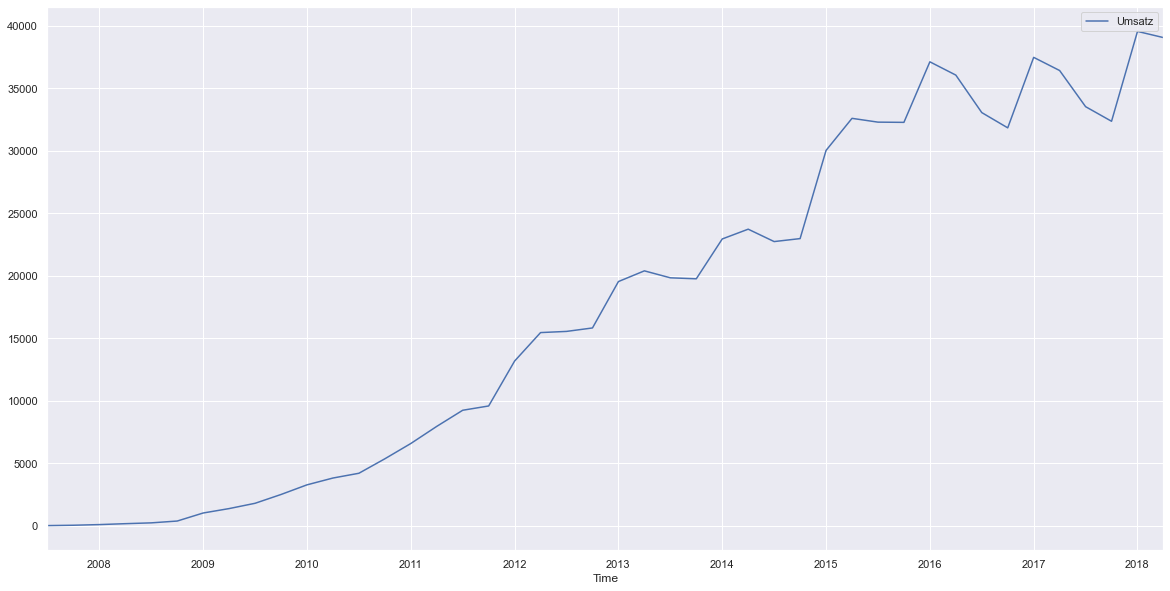

In [13]:
ewm.plot()

Smohed MA

In [6]:
  
from __future__ import absolute_import
import numpy as np
from pyti import catch_errors
from pyti.function_helper import fill_for_noncomputable_vals
from six.moves import range

import pandas as pd

def smoothed_moving_average(data, period):
    """
    Smoothed Moving Average.
    Formula:
    smma = avg(data(n)) - avg(data(n)/n) + data(t)/n
    """
    catch_errors.check_for_period_error(data, period)
    series = pd.Series(data)
    return series.ewm(alpha = 1.0/period).mean().values.flatten()


In [56]:
X = data
size = int(len(X) * 0.70)
train, test = X[0:size], X[size:len(X)]

In [57]:
sma = smoothed_moving_average(train.values.squeeze(), 8)
frct = list()
for i in range(len(test)):
    frct.append(sma[-1])
frct = np.array(frct)

from sklearn.metrics import mean_squared_error
print( mean_squared_error(test, frct))


from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(test, frct))

from sklearn.metrics import mean_absolute_error as mae
print(mae(test, frct))

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test, frct))



250032111.1164015
0.2190691609848783
10631.267641321461


15812.403710897388

Plot

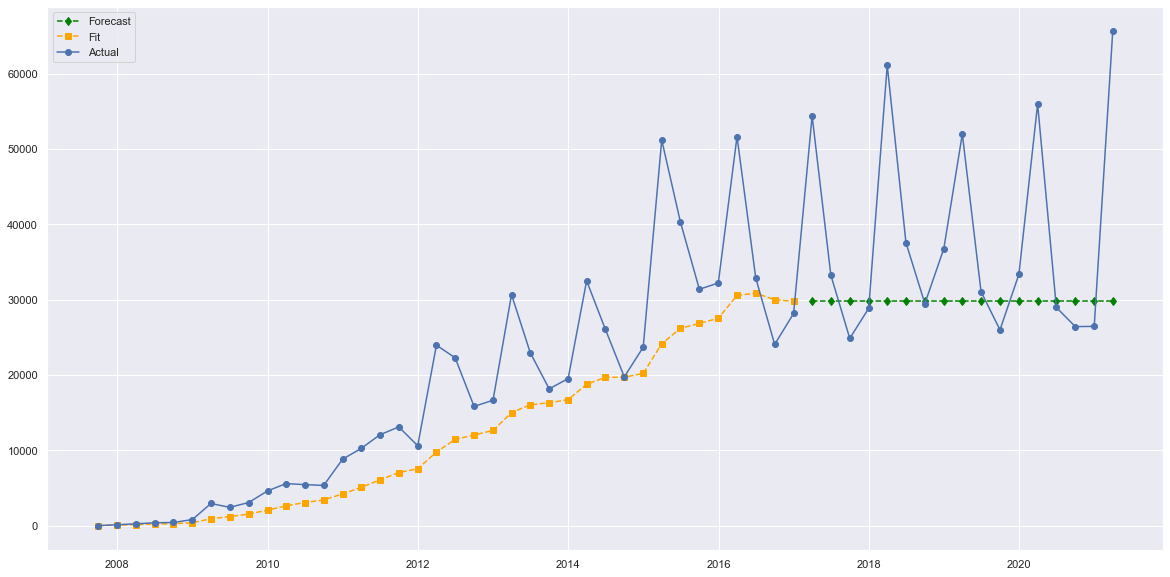

In [58]:
frct_plot = pd.DataFrame(frct, index = test.index)
sma = pd.DataFrame(sma, index = train.index)

plt.plot(frct_plot, color = "green", linestyle = "dashed", marker = "d", label = "Forecast")
plt.plot(sma, color = "orange", linestyle = "dashed", marker = "s", label = "Fit")
plt.plot(data, marker = "o", label = "Actual")
plt.legend()

Fitting

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error as mae, mean_squared_error
print("MSE:", mean_squared_error(train, sma),
     "MAPE:", mean_absolute_percentage_error(train, sma),
      "MAE:", mae(train, sma),
      "RMSE:", np.sqrt(mean_squared_error(train, sma)))

MSE: 54791552.28288428 MAPE: 0.48509908770234317 MAE: 5279.075572628319 RMSE: 7402.131603996532


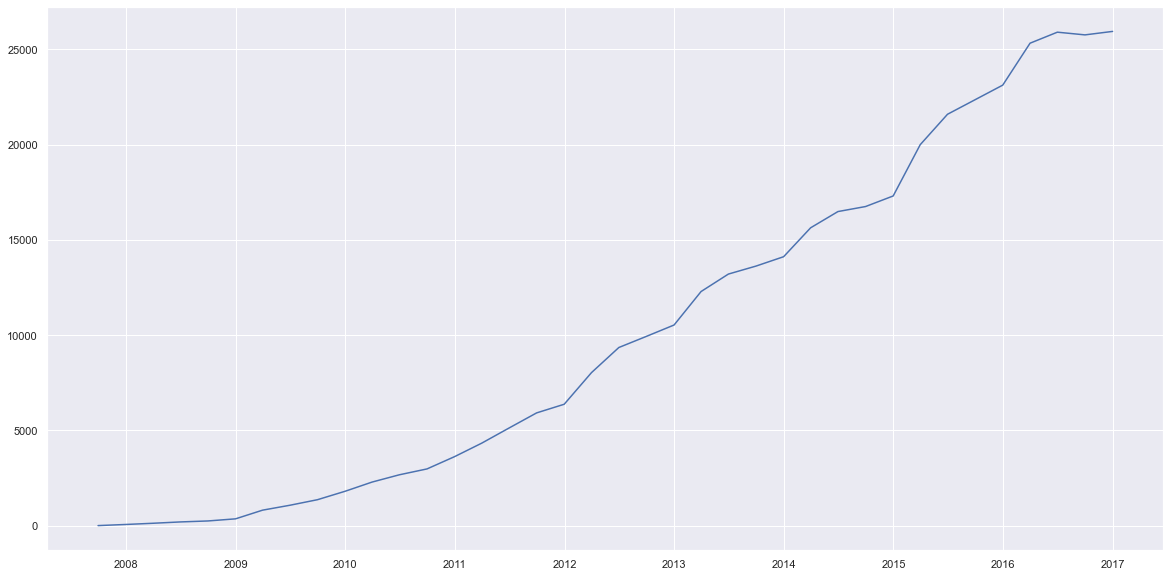

In [33]:
plt.plot(sma)

wma

In [18]:
import pandas as pd
import numpy as np

def wma(df, column='Umsatz', n = 4, add_col=False):

    weights = np.arange(1, n + 1)
    wmas = df[column].rolling(n).apply(lambda x: np.dot(x, weights) /
                                       weights.sum(), raw=True).to_list()

    if add_col == True:
        df[f'{column}_WMA_{n}'] = wmas
        return df
    else:
        return wmas

In [19]:
wma = wma(data[:44])
frct = list()
for i in range(11):
    frct.append(wma[-1])
frct = np.array(frct)

from sklearn.metrics import mean_squared_error
print( mean_squared_error(data.values[44:], frct))


from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(data.values[44:], frct))

from sklearn.metrics import mean_absolute_error as mae
print(mae(data.values[44:], frct))

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(data.values[44:], frct))

191274660.06909087
0.37628527072763895
13011.90909090909


13830.208243880164

In [17]:
wma

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 1070.9642857142858,
 1502.4642857142858,
 2005.7142857142858,
 2790.3928571428573,
 3662.1785714285716,
 4315.0,
 4760.571428571428,
 5916.428571428572,
 7216.464285714285,
 8691.0,
 10106.607142857143,
 10594.285714285714,
 14238.964285714286,
 16804.25,
 17150.714285714286,
 17453.214285714286,
 21030.678571428572,
 22017.35714285714,
 21451.89285714286,
 20955.785714285714,
 23865.25,
 24801.14285714286,
 23792.964285714286,
 23655.60714285714,
 30643.60714285714,
 33898.5,
 34134.607142857145,
 34157.46428571428,
 39047.142857142855,
 38329.07142857143,
 34940.67857142857,
 32567.071428571428,
 37570.17857142857,
 36787.607142857145,
 33837.107142857145,
 32149.571428571428,
 39340.42857142857,
 39636.21428571428]